In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5ddl1WTkLRNsbMmrw2KxPR6ITPdS_BEQ_Op2t9Y1ZhNZe8L4ijJiE
Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 6359, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 6359 (delta 39), reused 37 (delta 18), pack-reused 6281
Receiving objects: 100% (6359/6359), 8.58 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (4346/4346), done.
/content/yolov5
     |████████████████████████████████| 645kB 7.5MB/s 


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


### Training the model
We can train the model with train.py command. Few options for training commands are:


*   img - define the size of input image
*   batch - define the batch size
* epochs - define the number of training epochs
* data - path to yaml file
* cfg - specify the model configuration
* weights - specify the path for the weights for transfer learning. Weights can be downloaded from [here](https://drive.google.com/drive/folders/1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

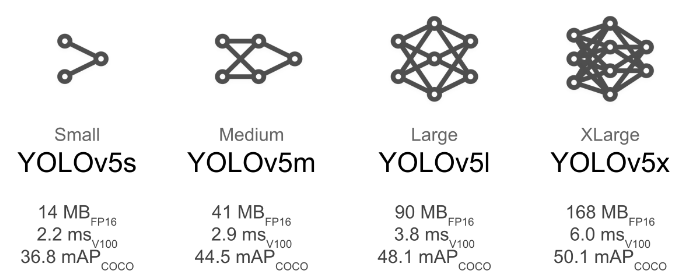

Comparison of the models can be seen [here](https://github.com/ultralytics/yolov5#pretrained-checkpoints).

In [ ]:
!python train.py --data '/content/drive/MyDrive/huhuhu/data.yaml' --cfg ./models/yolov5s.yaml --weights '' 


github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-108-g19100ba torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='/content/drive/MyDrive/huhuhu/data.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-22 09:46:26.072620: I tensorflow/stream_executor/platform/default/dso_loa

In [ ]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/huhuhu/best.pt


In [ ]:
!python detect.py --weights /content/drive/MyDrive/huhuhu/best.pt --conf 0.2 --source /content/drive/MyDrive/huhuhu/BK.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/drive/MyDrive/huhuhu/BK.mp4', update=False, view_img=False, weights=['/content/drive/MyDrive/huhuhu/best.pt'])
YOLOv5 🚀 v5.0-108-g19100ba torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
video 1/1 (1/360) /content/drive/MyDrive/huhuhu/BK.mp4: 384x640 Done. (0.009s)
video 1/1 (2/360) /content/drive/MyDrive/huhuhu/BK.mp4: 384x640 Done. (0.009s)
video 1/1 (3/360) /content/drive/MyDrive/huhuhu/BK.mp4: 384x640 Done. (0.009s)
video 1/1 (4/360) /content/drive/MyDrive/huhuhu/BK.mp4: 384x640 Done. (0.009s)
video 1/1 (5/360) /content/drive/MyDrive/huhuhu/BK.mp4: 384x640 Done. (0.008s)
video 1/1 (6

In [ ]:
!ls runs/detect/exp
!pwd

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('./runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")